In [2]:
# import zipfile
# import os

# # Đường dẫn tới tệp zip vừa tải
# zip_file_path = "archive.zip"

# # Giải nén tệp zip
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # Giải nén vào thư mục hiện tại
#     zip_ref.extractall(os.getcwd())

# print(f"Đã giải nén tệp tin {zip_file_path}.")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("Online Retail.csv")
# Hiển thị dữ liệu 5 dòng dữ liệu đầu tiên
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


Tổng Quan dữ liệu

In [5]:
print("Toàn bộ cột trong bảng dữ liệu")
for x in df.columns:
    print(x)
print('\n')
print('Số dòng của bộ dữ liệu: ',len(df))

Toàn bộ cột trong bảng dữ liệu
InvoiceNo
InvoiceDate
InvoiceTime
StockCode
Description
Quantity
UnitPrice
Totalsale
CustomerID
Country


Số dòng của bộ dữ liệu:  541909


DATA CLEANING 
Kiểm Tra Và Clean dữ liệu 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   InvoiceTime  541909 non-null  object 
 3   StockCode    541909 non-null  object 
 4   Description  540455 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Totalsale    541909 non-null  float64
 8   CustomerID   406829 non-null  float64
 9   Country      541909 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


In [7]:
df.describe()


,Quantity,UnitPrice,Totalsale,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,17.987795,15287.690570
std,218.081158,96.759853,378.810824,1713.600303
min,-80995.000000,-11062.060000,-168469.600000,12346.000000
25%,1.000000,1.250000,3.400000,13953.000000
50%,3.000000,2.080000,9.750000,15152.000000
75%,10.000000,4.130000,17.400000,16791.000000
max,80995.000000,38970.000000,168469.600000,18287.000000


In [8]:
df1 = df[df.CustomerID.isnull()]
print(df1.head())
print("Số giá trị bị thiếu ở cột CustomerID ", len(df1))

     InvoiceNo InvoiceDate  InvoiceTime StockCode  \
622     536414  01-12-2010  11:52:00 AM     22139   
1443    536544  01-12-2010  02:32:00 PM     21773   
1444    536544  01-12-2010  02:32:00 PM     21774   
1445    536544  01-12-2010  02:32:00 PM     21786   
1446    536544  01-12-2010  02:32:00 PM     21787   

                          Description  Quantity  UnitPrice  Totalsale  \
622                               NaN        56       0.00       0.00   
1443  DECORATIVE ROSE BATHROOM BOTTLE         1       2.51       2.51   
1444  DECORATIVE CATS BATHROOM BOTTLE         2       2.51       5.02   
1445               POLKADOT RAIN HAT          4       0.85       3.40   
1446            RAIN PONCHO RETROSPOT         2       1.66       3.32   

      CustomerID         Country  
622          NaN  United Kingdom  
1443         NaN  United Kingdom  
1444         NaN  United Kingdom  
1445         NaN  United Kingdom  
1446         NaN  United Kingdom  
Số giá trị bị thiếu ở cột Custom

In [9]:
# Ktra có bao nhiêu trường dữ liệu bị lặp lại
df.duplicated().sum()

np.int64(5268)

In [10]:
# 1.Loại bỏ những dòng trùng nhau
df.drop_duplicates(inplace=True)
# Đặt lại chỉ số
df.reset_index(drop=True,inplace=True)
# 2.Loại bỏ những hàng mà giá trị bị thiếu 
df.dropna(subset=['Description'],axis=0,inplace=True)
# 3.Làm cho tất cả các mục thấp hơn
df.Description = df.Description.apply(str.lower)
#xóa khoảng trắng ở đầu và cuối, đồng thời xóa dấu ".",không thể xóa các dấu câu khác vì chúng có thể là một phần của chính mục đó
df.Description = df.Description.apply(lambda x: x.replace(".", "").strip())
#4: Điền giá trị 0 vào những ô có giá trị NaN hoặc loại bỏ nó
df.CustomerID.fillna(0, inplace=True)
#df.dropna(subset=['CustomerID'], axis=0, inplace=True)
#5: Dặt giá trị tuyệt đối cho những cột sau
df.UnitPrice = df.UnitPrice.abs()
df.Quantity = df.Quantity.abs()
df.Totalsale = df.Totalsale.abs()


C:\Users\84974\AppData\Local\Temp\ipykernel_12480\2997788464.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CustomerID.fillna(0, inplace=True)


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 536640
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    535187 non-null  object 
 1   InvoiceDate  535187 non-null  object 
 2   InvoiceTime  535187 non-null  object 
 3   StockCode    535187 non-null  object 
 4   Description  535187 non-null  object 
 5   Quantity     535187 non-null  int64  
 6   UnitPrice    535187 non-null  float64
 7   Totalsale    535187 non-null  float64
 8   CustomerID   535187 non-null  float64
 9   Country      535187 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 44.9+ MB


,Quantity,UnitPrice,Totalsale,CustomerID
count,535187.000000,535187.00000,535187.000000,535187.000000
mean,11.302279,4.72792,21.596591,11466.973804
std,218.980977,97.36083,380.993187,6778.037985
min,1.000000,0.00000,0.000000,0.000000
25%,1.000000,1.25000,3.900000,12348.000000
50%,3.000000,2.08000,9.900000,14360.000000
75%,11.000000,4.13000,17.700000,16242.000000
max,80995.000000,38970.00000,168469.600000,18287.000000


Chuẩn bị dữ liệu để trực quan hóa

In [12]:
#Đảm bảo tất cả ngày trên hóa đơn được định dạng theo format="%d-%m-%Y"
df.InvoiceDate = pd.to_datetime(df.InvoiceDate,format="%d-%m-%Y")

# Trích xuất và thêm 2 cột mới là Year và Month để tiện phân tích
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

# Đồng thời tạo thêm cột mùa vào bảng
# seasons = [4,4,1,1,1,2,2,2,3,3,3,4]
seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']

month_to_season = dict(zip(range(1,13),seasons))

# Thêm cột Season(Mùa)
df['Season'] = df.Month.map(month_to_season)

df[['InvoiceDate','Year','Month','Season']].sample(5)

,InvoiceDate,Year,Month,Season
456815,2011-11-11,2011,11,Fall
70595,2011-01-25,2011,1,Winter
406903,2011-10-20,2011,10,Fall
471515,2011-11-17,2011,11,Fall
317631,2011-08-31,2011,8,Summer


In [13]:
df.head(10)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Year,Month,Season
0,536365,2010-12-01,08:26:00 AM,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom,2010,12,Winter
1,536365,2010-12-01,08:26:00 AM,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter
2,536365,2010-12-01,08:26:00 AM,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,2010,12,Winter
3,536365,2010-12-01,08:26:00 AM,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter
4,536365,2010-12-01,08:26:00 AM,84029E,red woolly hottie white heart,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter
5,536365,2010-12-01,08:26:00 AM,22752,set 7 babushka nesting boxes,2,7.65,15.30,17850.0,United Kingdom,2010,12,Winter
6,536365,2010-12-01,08:26:00 AM,21730,glass star frosted t-light holder,6,4.25,25.50,17850.0,United Kingdom,2010,12,Winter
7,536366,2010-12-01,08:28:00 AM,22633,hand warmer union jack,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter
8,536366,2010-12-01,08:28:00 AM,22632,hand warmer red polka dot,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter
9,536367,2010-12-01,08:34:00 AM,84879,assorted colour bird ornament,32,1.69,54.08,13047.0,United Kingdom,2010,12,Winter


In [14]:
def extract_am_pm(time):
    """
    Hàm này lấy thời gian dưới dạng chuỗi và trích xuất 
    nếu đó là AM hoặc PM

    thời gian dưới dạng chuỗi return: AM hoặc PM
    """
    # lấy phần thứ hai của thời gian chuỗi 
    am_pm = time.split()[1] 
    # returning the value
    return am_pm


In [15]:
# Thêm cột là sáng hoặc tối
df['AM_or_PM'] = df.InvoiceTime.apply(extract_am_pm)

In [16]:
df.head(10)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Year,Month,Season,AM_or_PM
0,536365,2010-12-01,08:26:00 AM,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom,2010,12,Winter,AM
1,536365,2010-12-01,08:26:00 AM,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter,AM
2,536365,2010-12-01,08:26:00 AM,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,2010,12,Winter,AM
3,536365,2010-12-01,08:26:00 AM,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter,AM
4,536365,2010-12-01,08:26:00 AM,84029E,red woolly hottie white heart,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter,AM
5,536365,2010-12-01,08:26:00 AM,22752,set 7 babushka nesting boxes,2,7.65,15.30,17850.0,United Kingdom,2010,12,Winter,AM
6,536365,2010-12-01,08:26:00 AM,21730,glass star frosted t-light holder,6,4.25,25.50,17850.0,United Kingdom,2010,12,Winter,AM
7,536366,2010-12-01,08:28:00 AM,22633,hand warmer union jack,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter,AM
8,536366,2010-12-01,08:28:00 AM,22632,hand warmer red polka dot,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter,AM
9,536367,2010-12-01,08:34:00 AM,84879,assorted colour bird ornament,32,1.69,54.08,13047.0,United Kingdom,2010,12,Winter,AM


In [17]:
df[['InvoiceTime', 'AM_or_PM']].sample(5)

,InvoiceTime,AM_or_PM
215522,05:09:00 PM,PM
156878,01:31:00 PM,PM
77767,01:15:00 PM,PM
507289,04:47:00 PM,PM
124771,01:33:00 PM,PM


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 536640
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   InvoiceDate  535187 non-null  datetime64[ns]
 2   InvoiceTime  535187 non-null  object        
 3   StockCode    535187 non-null  object        
 4   Description  535187 non-null  object        
 5   Quantity     535187 non-null  int64         
 6   UnitPrice    535187 non-null  float64       
 7   Totalsale    535187 non-null  float64       
 8   CustomerID   535187 non-null  float64       
 9   Country      535187 non-null  object        
 10  Year         535187 non-null  int32         
 11  Month        535187 non-null  int32         
 12  Season       535187 non-null  object        
 13  AM_or_PM     535187 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(7)
memory usage: 57.2+ MB


PHÂN TÍCH KHAI THÁC DỮ LIỆU 

array([[<Axes: title={'center': 'InvoiceDate'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'Totalsale'}>,
        <Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

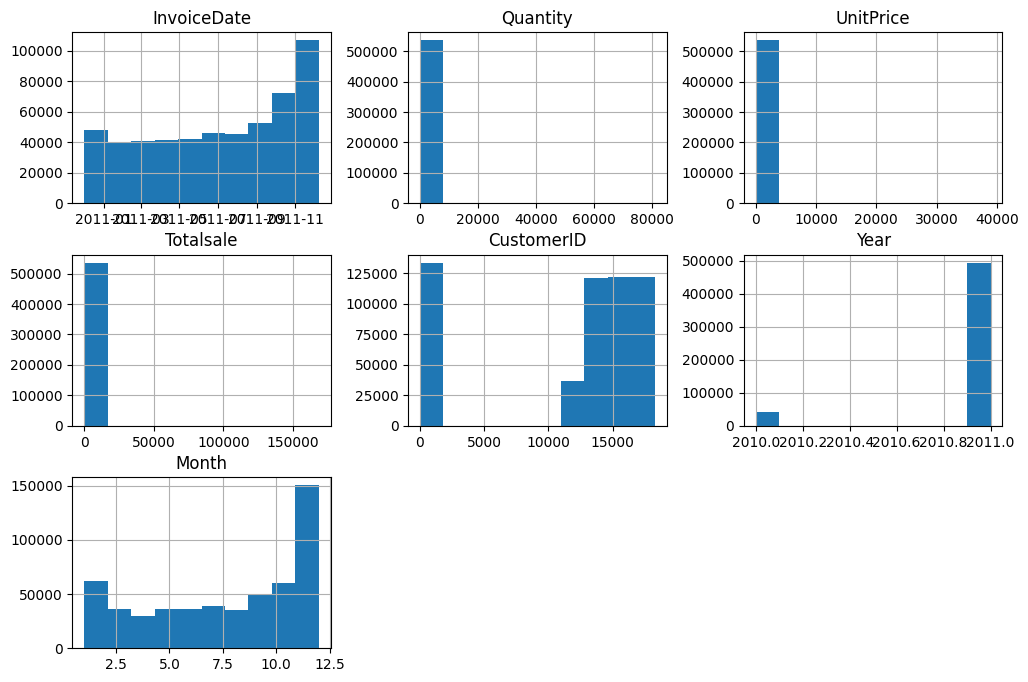

In [19]:
df.hist(figsize=(12,8))

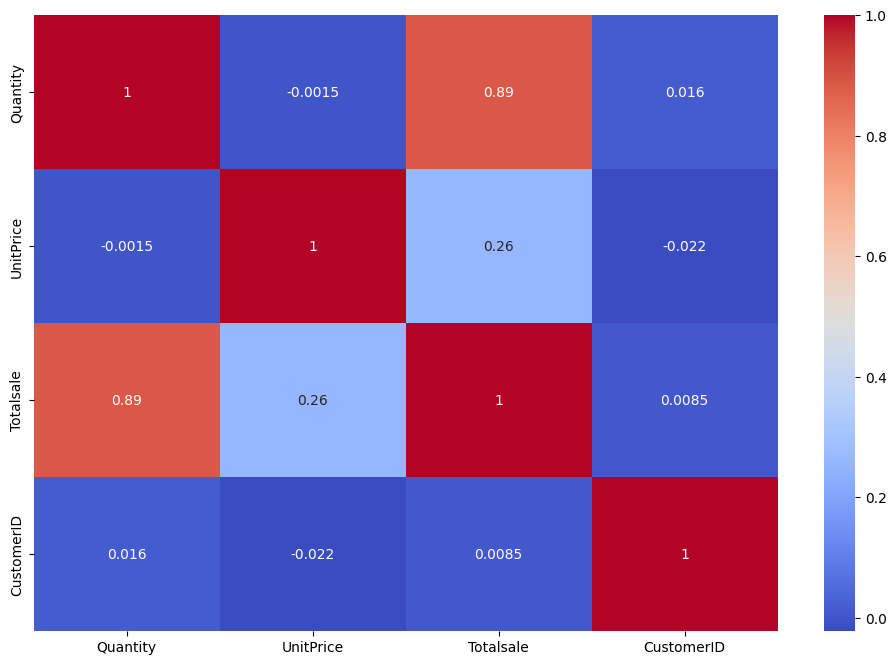

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Vẽ heatmap ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.show()

In [21]:
def number_of_unique(dataframe):
    for col in dataframe.columns:
        print("Cột {} có {} số giá trị độc lập.".format(col, dataframe[col].nunique()))

In [22]:
number_of_unique(df)

Cột InvoiceNo có 24446 số giá trị độc lập.
Cột InvoiceDate có 305 số giá trị độc lập.
Cột InvoiceTime có 774 số giá trị độc lập.
Cột StockCode có 3958 số giá trị độc lập.
Cột Description có 4191 số giá trị độc lập.
Cột Quantity có 457 số giá trị độc lập.
Cột UnitPrice có 1629 số giá trị độc lập.
Cột Totalsale có 4914 số giá trị độc lập.
Cột CustomerID có 4373 số giá trị độc lập.
Cột Country có 38 số giá trị độc lập.
Cột Year có 2 số giá trị độc lập.
Cột Month có 12 số giá trị độc lập.
Cột Season có 4 số giá trị độc lập.
Cột AM_or_PM có 2 số giá trị độc lập.


In [23]:
def barplot_percentage(column, title=" ", slice=12 ,palette="Set2"):
    # Số dòng
    total = df.shape[0]

    f, ax = plt.subplots(figsize=(14, 8))

    # Sử dụng đối số từ khóa x và y
    ax = sns.barplot(x=df[column].value_counts()[:slice].index, 
                     y=df[column].value_counts()[:slice].values,palette=palette)

    ax.set_title(title)

    # Thêm tỷ lệ phần trăm 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{percentage}', (x + width / 2, y + height * 1.02), ha='center')

    plt.ylabel("Count")
    plt.show()


C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


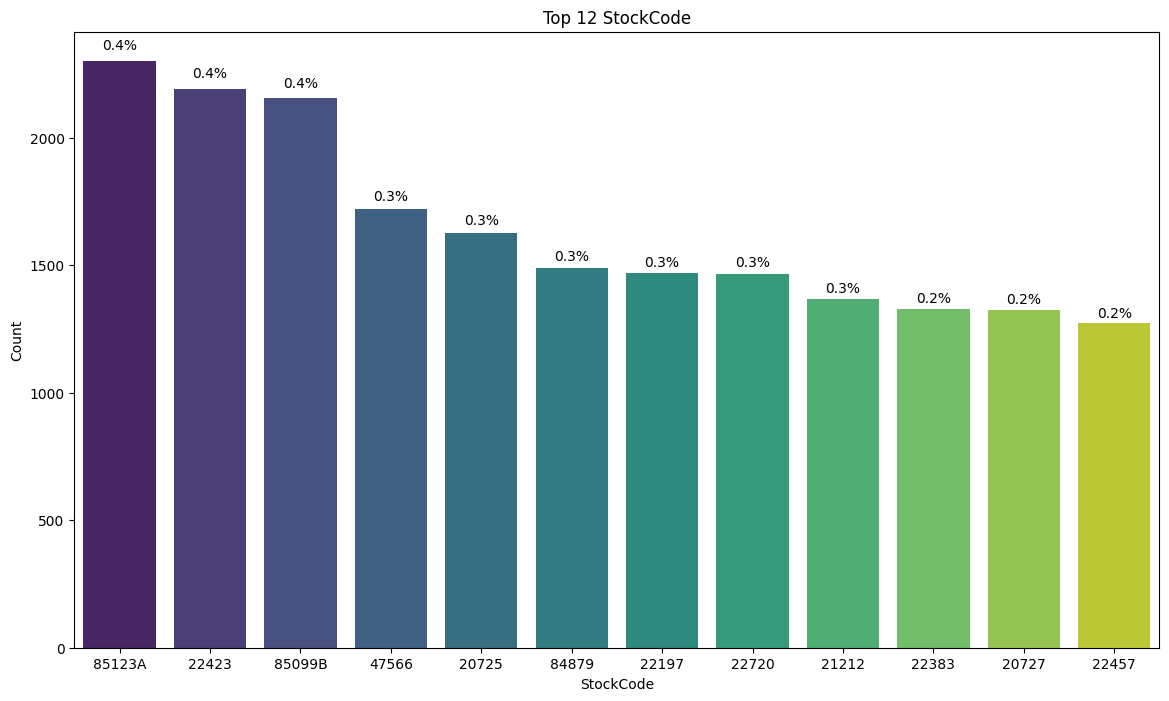

In [24]:
# Gọi hàm để vẽ biểu đồ
barplot_percentage("StockCode", "Top 12 StockCode",palette="viridis")

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


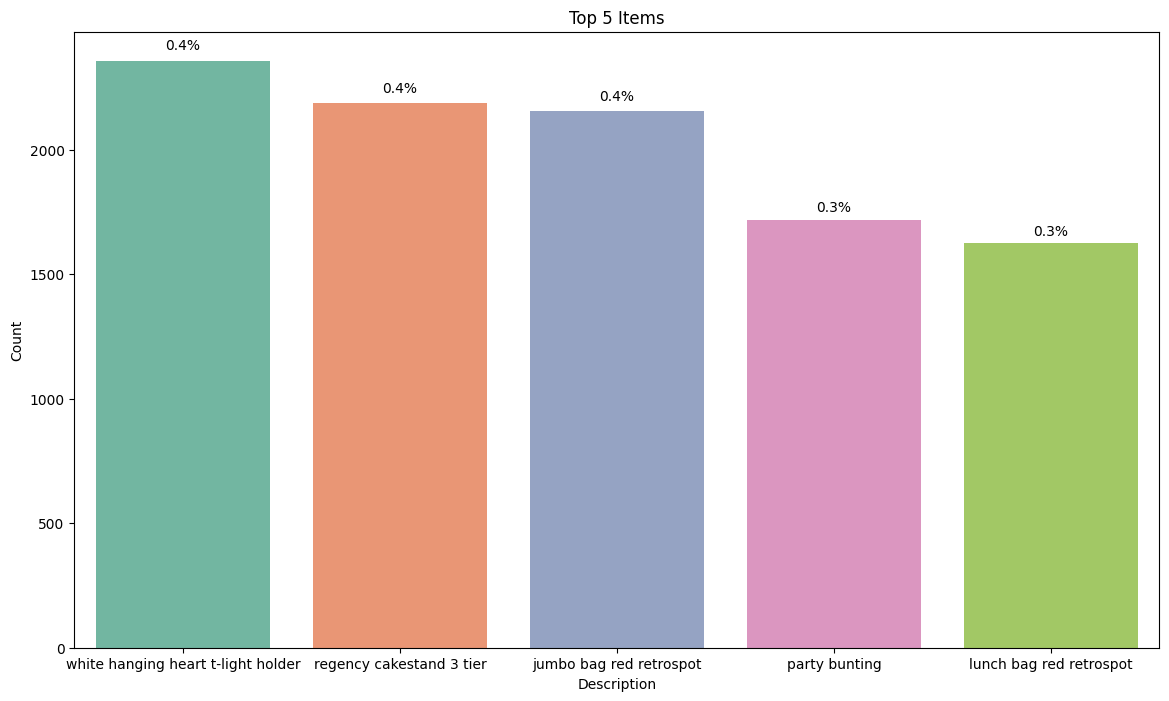

In [25]:
#Biểu đồ Top 5 sản phẩm được bán chạy nhất
barplot_percentage("Description", "Top 5 Items", 5)

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


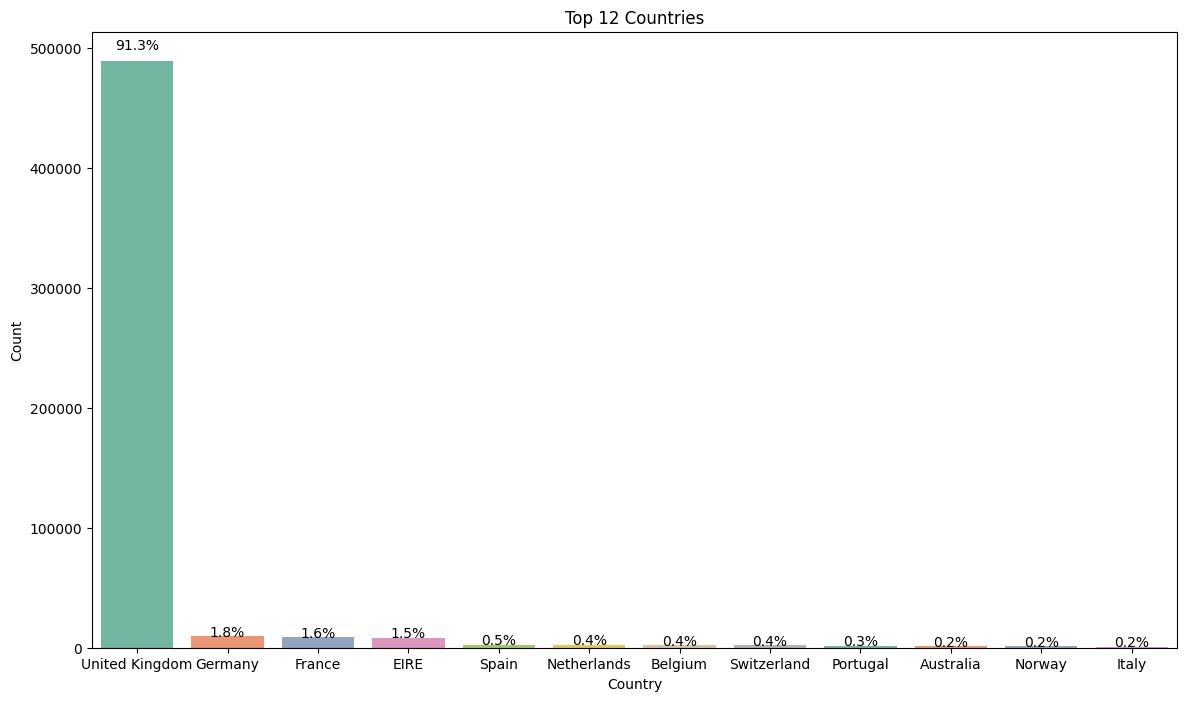

In [26]:
# Biểu đồ lượng mua sản phẩm trong top 12 quốc gia
barplot_percentage("Country", "Top 12 Countries")

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


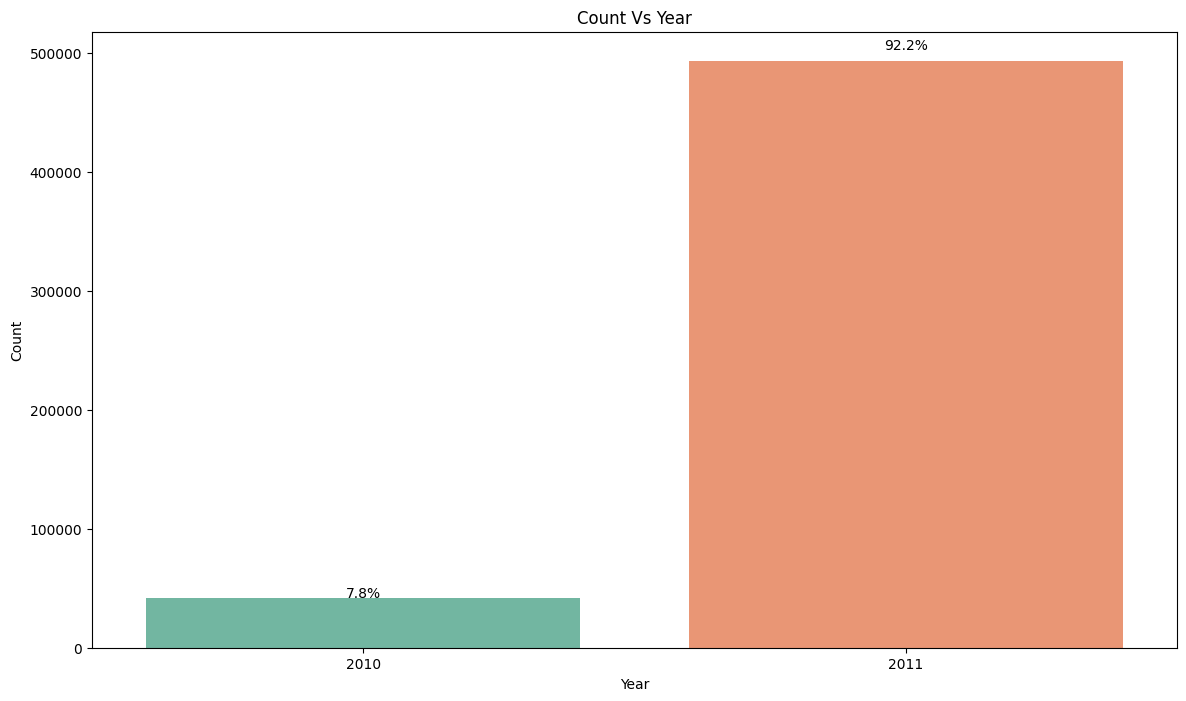

In [27]:
# Biểu đồ so sánh lượng bán giữa 2 năm 2010 và 2011
barplot_percentage("Year", "Count Vs Year")

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


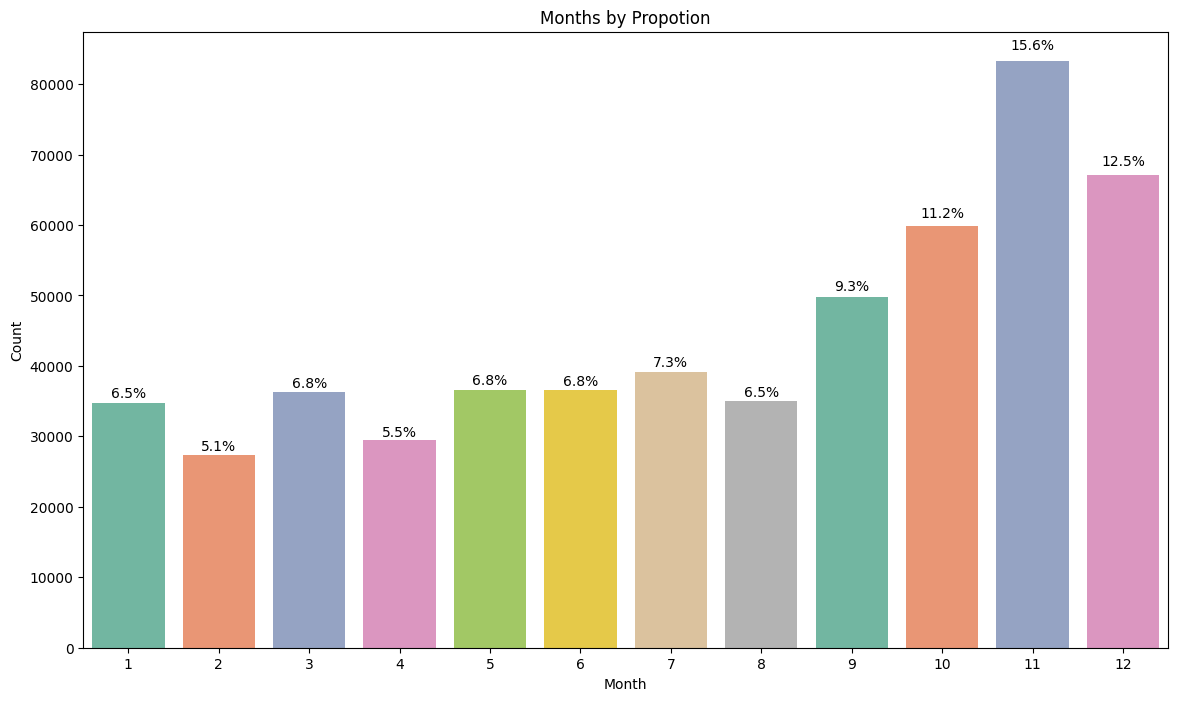

In [28]:
# Biểu đồ lượng bán theo từng tháng
barplot_percentage("Month", "Months by Propotion")

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


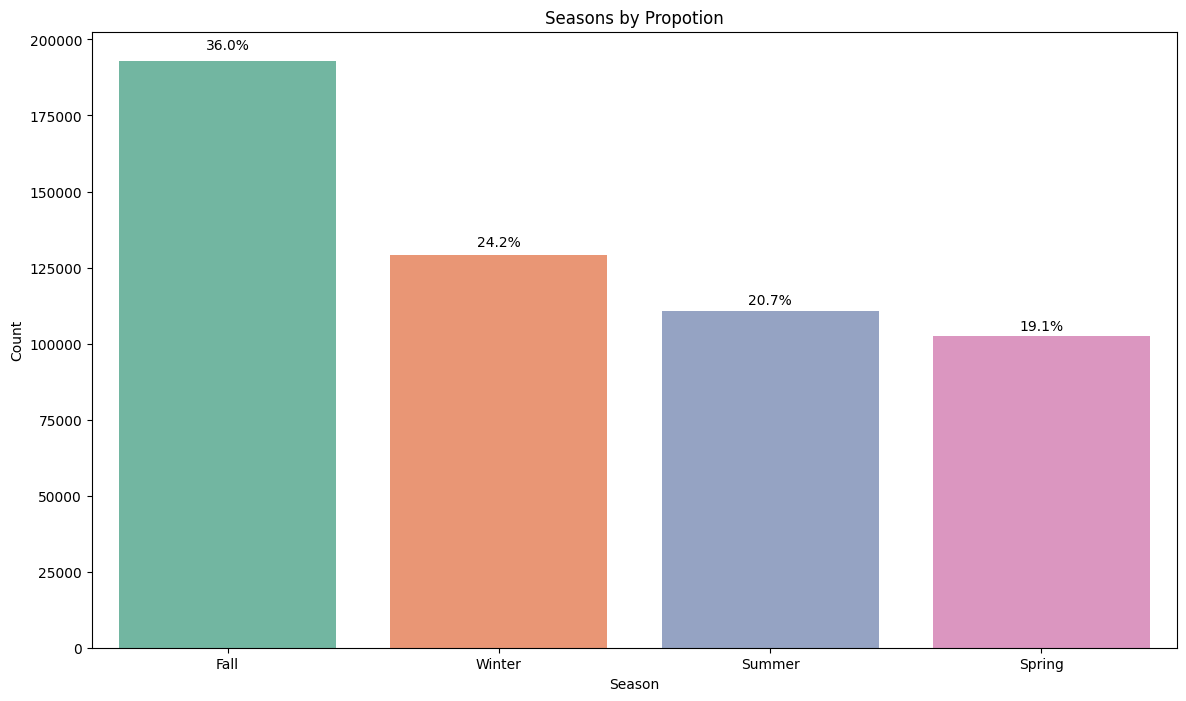

In [29]:
# Biểu đồ lượng bán theo mùa
barplot_percentage("Season", "Seasons by Propotion")

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


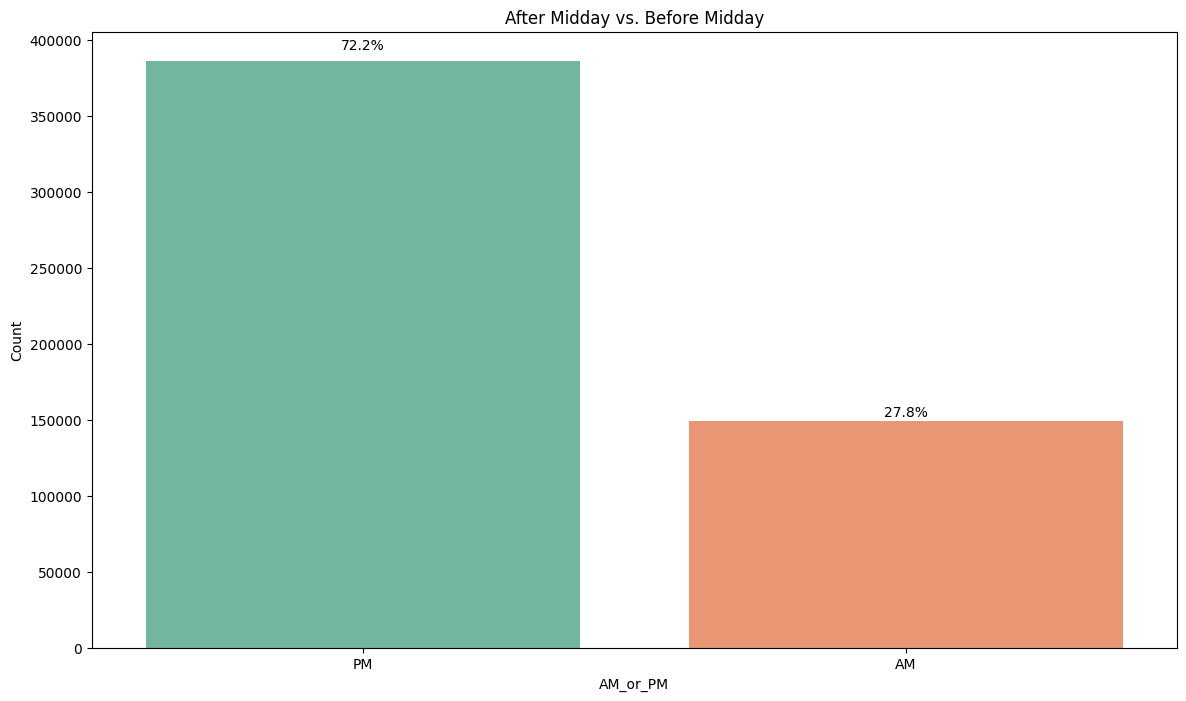

In [30]:
# Biểu đồ lượng bán phân theo buổi trong ngày 
barplot_percentage("AM_or_PM", "After Midday vs. Before Midday")

In [57]:
#Số đơn hàng của từng nước
print(df.InvoiceNo.nunique())
print("\n")
print(df.Country.value_counts())

24446


Country
United Kingdom          488846
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                    

In [58]:
import plotly.express as px
import pandas as pd

# Assuming 'df' is your DataFrame with 'Country' and order counts

# Group by country and count orders
country_orders = df.groupby('Country')['InvoiceNo'].count().reset_index() 
# Using 'InvoiceNo' to count orders, assuming each invoice represents an order

# Create the choropleth map
fig = px.choropleth(
    country_orders,
    locations='Country',
    locationmode='country names',
    color='InvoiceNo',  # Now using 'InvoiceNo' which represents order count
    color_continuous_scale='Viridis', 
    title='Order Distribution by Country'
)
fig.update_layout(
    autosize=False,  # Disable autosizing
    width=1000,     # Set width in pixels (adjust as needed)
    height=600      # Set height in pixels (adjust as needed)
)
fig.show()

CHƯƠNG V : MACHINE LEARNING 


In [31]:

df.Description.head(10)
print(df)

       InvoiceNo InvoiceDate  InvoiceTime StockCode  \
0         536365  2010-12-01  08:26:00 AM    85123A   
1         536365  2010-12-01  08:26:00 AM     71053   
2         536365  2010-12-01  08:26:00 AM    84406B   
3         536365  2010-12-01  08:26:00 AM    84029G   
4         536365  2010-12-01  08:26:00 AM    84029E   
...          ...         ...          ...       ...   
536636    581587  2011-12-09  12:50:00 PM     22613   
536637    581587  2011-12-09  12:50:00 PM     22899   
536638    581587  2011-12-09  12:50:00 PM     23254   
536639    581587  2011-12-09  12:50:00 PM     23255   
536640    581587  2011-12-09  12:50:00 PM     22138   

                                Description  Quantity  UnitPrice  Totalsale  \
0        white hanging heart t-light holder         6       2.55      15.30   
1                       white metal lantern         6       3.39      20.34   
2            cream cupid hearts coat hanger         8       2.75      22.00   
3       knitted union f

In [32]:
df.Description = df.Description.apply(lambda x: str(x).lower())
df.Description = df.Description.apply(lambda x: x.replace(".", "").strip())
df.Description.head(10)

0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
5           set 7 babushka nesting boxes
6      glass star frosted t-light holder
7                 hand warmer union jack
8              hand warmer red polka dot
9          assorted colour bird ornament
Name: Description, dtype: object

In [33]:
items_temp = df.groupby('StockCode').Description.unique()
items = list(zip(items_temp.index.tolist(),items_temp.values.tolist()))
description = [x[1][0] for x in items]
n_description = pd.Series([x[1][0] for x in items])
print(n_description)


0              inflatable political globe
1                groovy cactus inflatable
2                            doggy rubber
3                    hearts wrapping tape
4             spots on red bookcover tape
                      ...                
3953    dotcomgiftshop gift voucher £2000
3954    dotcomgiftshop gift voucher £3000
3955    dotcomgiftshop gift voucher £4000
3956    dotcomgiftshop gift voucher £5000
3957                               manual
Length: 3958, dtype: object


In [34]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Giả sử 'description' là danh sách các mô tả sản phẩm như trước
descs_p = []

for desc in description:
    doc = nlp(desc)
    nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    descs_p.append(nouns)

descs_p = pd.Series(descs_p)
print(descs_p)


0                        [globe]
1                       [cactus]
2                       [rubber]
3                 [hearts, tape]
4       [spots, bookcover, tape]
                  ...           
3953      [dotcomgiftshop, gift]
3954      [dotcomgiftshop, gift]
3955      [dotcomgiftshop, gift]
3956      [dotcomgiftshop, gift]
3957                    [manual]
Length: 3958, dtype: object


In [35]:
import pandas as pd
import spacy
import webcolors

# Load mô hình tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

# Giả sử description là danh sách mô tả sản phẩm ban đầu (list hoặc pd.Series)
# Nếu bạn đã có từ trước: description = [x[1][0] for x in items]
description = pd.Series(description)

# 1. Lấy ra danh từ từ mỗi mô tả
def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == "NOUN"]

# Áp dụng lọc danh từ
descs_p = description.apply(extract_nouns)

# 2. Lemmatize (đưa về từ gốc) mỗi mô tả sau khi lọc danh từ
def lemmatize_sentence(words):
    doc = nlp(" ".join(words))
    return " ".join([token.lemma_ for token in doc])

lemmatized_descs = descs_p.apply(lemmatize_sentence)

# 3. Loại bỏ tên màu (CSS3 color names)
# Cách lấy danh sách tên màu trong phiên bản webcolors mới
colors = [
    'red', 'green', 'blue', 'black', 'white', 'yellow', 'pink', 'purple',
    'orange', 'brown', 'grey', 'gray', 'gold', 'silver', 'beige', 'navy',
    'maroon', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'indigo', 'violet'
]

# 4. Xoá các từ là tên màu ra khỏi mô tả
color_removed_desc = [
    ' '.join([word for word in desc.split() if word.lower() not in colors])
    for desc in lemmatized_descs
]

# 5. In kết quả
print(pd.Series(color_removed_desc))


0                     globe
1                    cactus
2                    rubber
3                heart tape
4       spot bookcover tape
               ...         
3953    dotcomgiftshop gift
3954    dotcomgiftshop gift
3955    dotcomgiftshop gift
3956    dotcomgiftshop gift
3957                 manual
Length: 3958, dtype: object


In [36]:
# Vectorize word
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Vectorize word
vectorizer_ntf = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(color_removed_desc)
matrix_1 = pd.concat([n_description, pd.DataFrame(X_ntf.toarray(), columns = vectorizer_ntf.get_feature_names_out())], axis = 1)
matrix_1.rename(columns = {0:'Description'}, inplace = True)
# Danh sách cột bạn muốn xem
desired_columns = ['Description', 'globe', 'tape', 'bookcov', 'parasol', 'paper', 'bookcov tape', 'design', 'design tape']

# Lọc ra những cột có thật sự tồn tại
available_columns = [col for col in desired_columns if col in matrix_1.columns]

# In kết quả
matrix_1[available_columns].head(20)


,Description,globe,tape,parasol,paper,design,design tape
0,inflatable political globe,1.0,0.000000,0.0,0.000000,0.000000,0.000000
1,groovy cactus inflatable,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,doggy rubber,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,hearts wrapping tape,0.0,0.560080,0.0,0.000000,0.000000,0.000000
4,spots on red bookcover tape,0.0,0.368588,0.0,0.000000,0.000000,0.000000
5,army camo bookcover tape,0.0,1.000000,0.0,0.000000,0.000000,0.000000
6,mini funky design tapes,0.0,0.545785,0.0,0.000000,0.393819,0.739611
7,colouring pencils brown tube,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,colouring pencils brown tube,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9,asstd design racing car pen,0.0,0.000000,0.0,0.000000,0.000000,0.000000


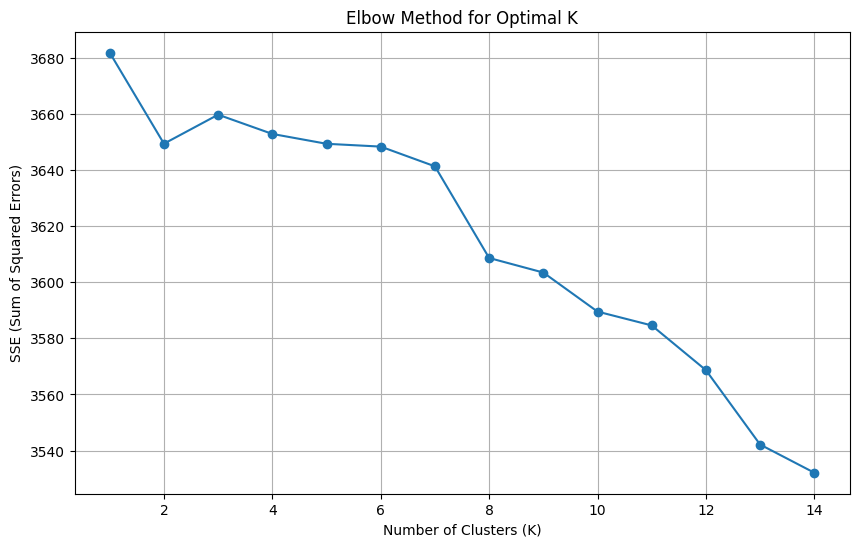

In [56]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Tính toán SSE (Sum of Squared Errors) cho các giá trị k khác nhau
wcss = []
k_range = range(1, 15)  # Thử nghiệm với số cụm từ 1 đến 14
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_ntf)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

# Tạo treemap từ dataframe n_description_clustered
fig = px.treemap(
    n_description_clustered,
    path=['Cluster', 'Description'],  # Cấu trúc phân cấp: Cụm -> Mô tả
    title="Treemap of Product Clusters",
    width=1000,
    height=600
)

# Hiển thị treemap
fig.show()

                   Description  Cluster
0   inflatable political globe        1
1     groovy cactus inflatable      122
2                 doggy rubber        1
3         hearts wrapping tape        1
4  spots on red bookcover tape        1


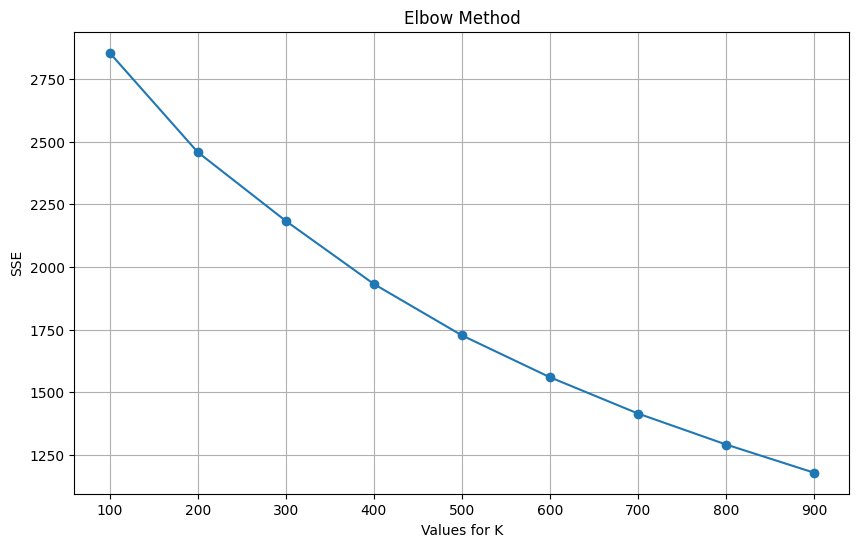

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# KMeans với k=300
kmeans_300 = KMeans(n_clusters=300, init='k-means++', random_state=42, n_init='auto')
labels = kmeans_300.fit_predict(X_ntf)

# Gán nhãn vào dataframe
n_description_clustered = pd.DataFrame({'Description': n_description, 'Cluster': labels})
print(n_description_clustered.head())

# Elbow method mở rộng như hình
wcss = []
k_range = range(100, 901, 100)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_ntf)
    wcss.append(kmeans.inertia_)

# Biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


In [ ]:
Bạn có thể chạy thuật toán elbow để tìm ra số cụm tối ưu cho Phần Description không?


SyntaxError: invalid syntax (2125240012.py, line 1)

In [38]:
from sklearn.cluster import KMeans
import pandas as pd

# Sử dụng KMeans để nhóm các sản phẩm thành 300 cụm
kmeans = KMeans(n_clusters=300, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_ntf)

# Gán nhãn cụm vào dataframe
n_description_clustered = pd.DataFrame({'Description': n_description, 'Cluster': labels})

# Hiển thị một số cụm và các sản phẩm trong cụm
for cluster_id in range(5):  # Hiển thị 5 cụm đầu tiên
    print(f"Cụm {cluster_id}:")
    print(n_description_clustered[n_description_clustered['Cluster'] == cluster_id]['Description'].tolist())
    print("\n")

Cụm 0:
['doorstop retrospot heart', 'christmas retrospot heart wood']


Cụm 1:
['inflatable political globe', 'doggy rubber', 'hearts wrapping tape', 'spots on red bookcover tape', 'mini funky design tapes', 'asstd design racing car pen', 'paper pocket traveling fan', 'pink paper parasol', 'blue paper parasol', 'red paper parasol', 'edwardian parasol black', 'edwardian parasol natural', 'edwardian parasol pink', 'edwardian parasol black', 'edwardian parasol natural', 'edwardian parasol pink', 'blue polkadot garden parasol', 'ice cream design garden parasol', 'fairy cake design umbrella', 'fairy cake design umbrella', 'small folding scissor(pointed edge)', 'folding camping scissor w/knif & s', 'food/drink sponge stickers', 'mini highlighter pens', 'pop art push down rubber', 'teatime pen case & pens', 'teatime round pencil sharpener', 'teatime gel pens asst', 'teatime push down rubber', 'popart rect pencil sharpener asst', 'wrap, carousel', 'wrap bad hair day', 'wrap  pink flock', 'wrap

In [39]:
# Tạo từ điển để lưu tên cụm
cluster_names = {}

# Lặp qua từng cụm
for cluster_id in n_description_clustered['Cluster'].unique():
    # Lấy danh sách các mô tả trong cụm
    descriptions_in_cluster = n_description_clustered[n_description_clustered['Cluster'] == cluster_id]['Description']
    
    # Tách các từ trong mô tả và đếm tần suất
    word_counts = pd.Series(' '.join(descriptions_in_cluster).split()).value_counts()
    
    # Lấy danh từ phổ biến nhất làm tên cụm
    cluster_names[cluster_id] = word_counts.index[0]

# Thay thế số label bằng tên cụm
n_description_clustered['Cluster'] = n_description_clustered['Cluster'].map(cluster_names)

# Hiển thị kết quả
print(n_description_clustered.head())

                   Description Cluster
0   inflatable political globe     set
1     groovy cactus inflatable  cactus
2                 doggy rubber     set
3         hearts wrapping tape     set
4  spots on red bookcover tape     set


In [40]:
import plotly.express as px

# Tạo treemap từ dataframe n_description_clustered
fig = px.treemap(
    n_description_clustered,
    path=['Cluster', 'Description'],  # Cấu trúc phân cấp: Cụm -> Mô tả
    title="Treemap of Product Clusters"
)

# Hiển thị treemap
fig.show()

In [54]:
import plotly.express as px

# Tạo treemap từ dataframe n_description_clustered
fig = px.treemap(
    n_description_clustered,
    path=['Cluster', 'Description'],  # Cấu trúc phân cấp: Cụm -> Mô tả
    title="Treemap of 300 Product Clusters",
    width=1000,
    height=600
)

# Hiển thị treemap
fig.show()

6. FP-Algorithm

In [41]:
data = df.copy()
invoices_ids = data.InvoiceNo.unique()[: 200]

In [42]:
# this code just gets me unique items, so I can use them as column
# this is my method, i'm sure there is better than this

all_items = []
for val in invoices_ids:
    general_items = data[data['InvoiceNo'] == val]['Description'].unique()
    #print("val: {}".format(val), general_items)
    all_items.append(list(general_items))

from functools import reduce

flatten_list = reduce(lambda z, y :z + y, all_items) # concatenating
flatten_list = set(flatten_list) # removing duplicates
# printing flatten_list
#print (flatten_list)

In [45]:
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 536640
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   InvoiceDate  535187 non-null  datetime64[ns]
 2   InvoiceTime  535187 non-null  object        
 3   StockCode    535187 non-null  object        
 4   Description  535187 non-null  object        
 5   Quantity     535187 non-null  int64         
 6   UnitPrice    535187 non-null  float64       
 7   Totalsale    535187 non-null  float64       
 8   CustomerID   535187 non-null  float64       
 9   Country      535187 non-null  object        
 10  Year         535187 non-null  int32         
 11  Month        535187 non-null  int32         
 12  Season       535187 non-null  object        
 13  AM_or_PM     535187 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(7)
memory usage: 57.2+ MB


,InvoiceDate,Quantity,UnitPrice,Totalsale,CustomerID,Year,Month
count,535187,535187.000000,535187.00000,535187.000000,535187.000000,535187.000000,535187.000000
mean,2011-07-03 22:09:10.170314496,11.302279,4.72792,21.596591,11466.973804,2010.921792,7.548397
min,2010-12-01 00:00:00,1.000000,0.00000,0.000000,0.000000,2010.000000,1.000000
25%,2011-03-28 00:00:00,1.000000,1.25000,3.900000,12348.000000,2011.000000,5.000000
50%,2011-07-19 00:00:00,3.000000,2.08000,9.900000,14360.000000,2011.000000,8.000000
75%,2011-10-19 00:00:00,11.000000,4.13000,17.700000,16242.000000,2011.000000,11.000000
max,2011-12-09 00:00:00,80995.000000,38970.00000,168469.600000,18287.000000,2011.000000,12.000000
std,NaN,218.980977,97.36083,380.993187,6778.037985,0.268499,3.508451


In [46]:
invoices_ids = df.InvoiceNo.unique()[: 200]

In [47]:
# this code just gets me unique items, so I can use them as column
# this is my method, i'm sure there is better than this

all_items = []
for val in invoices_ids:
    general_items = data[data['InvoiceNo'] == val]['Description'].unique()
    #print("val: {}".format(val), general_items)
    all_items.append(list(general_items))

from functools import reduce

flatten_list = reduce(lambda z, y :z + y, all_items) # concatenating
flatten_list = set(flatten_list) # removing duplicates

# printing flatten_list
#print (flatten_list)

In [48]:
# Chuyển đổi flatten_list từ set sang list
flatten_list = list(flatten_list)

# Tạo DataFrame với các cột từ flatten_list
fp_growth_df = pd.DataFrame(index=invoices_ids, columns=flatten_list)
fp_growth_df.fillna(0, inplace=True)
fp_growth_df.head()

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\506468007.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,pink fairy cake childrens apron,5 strand glass necklace crystal,red retrospot tissue box,red heart luggage tag,cinammon set of 9 t-lights,small medina stamped metal bowl,pink/purple retro radio,french blue metal door sign no,lilac diamante pen in gift box,birdhouse garden marker,...,regency cakestand 3 tier,spotty pink duck doorstop,bag 250g swirly marbles,set/10 blue polkadot party candles,candy shop sticker sheet,photo cube,turquoise glass tassle bag charm,pink diamante pen in gift box,retrospot tea set ceramic 11 pc,silver plate candle bowl small
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# assigning 1 if this item X was in that invoice id Y
for val in invoices_ids:
    general_items = data[data['InvoiceNo'] == val]['Description'].unique()
    for item in general_items:
        fp_growth_df.loc[val][item] = 1
fp_growth_df.head()

C:\Users\84974\AppData\Local\Temp\ipykernel_12480\2086857108.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pink fairy cake childrens apron,5 strand glass necklace crystal,red retrospot tissue box,red heart luggage tag,cinammon set of 9 t-lights,small medina stamped metal bowl,pink/purple retro radio,french blue metal door sign no,lilac diamante pen in gift box,birdhouse garden marker,...,regency cakestand 3 tier,spotty pink duck doorstop,bag 250g swirly marbles,set/10 blue polkadot party candles,candy shop sticker sheet,photo cube,turquoise glass tassle bag charm,pink diamante pen in gift box,retrospot tea set ceramic 11 pc,silver plate candle bowl small
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# installing mlxtend library
# !pip install mlxtend

In [51]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth

#running the fpgrowth algorithm
res = fpgrowth(fp_growth_df, min_support=0.05, use_colnames=True)

# printing top 10
res.head(10) 

C:\Users\84974\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets


In [52]:
res.shape

(0, 2)